In [1]:
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import random
from numba import jit
pd.set_option('display.max_columns', 50)

adj_jpm = pd.DataFrame.from_csv('adjJPM.csv')
del adj_jpm['Close']
display(adj_jpm.head())

,Open,High,Low,Volume,Adj Close
1983-12-30,2.602623,2.632198,2.573048,3.575624e+06,2.602623
1984-01-03,2.598926,2.617409,2.580440,6.517272e+06,2.602623
1984-01-04,2.652532,2.713529,2.617410,4.945011e+06,2.713529
1984-01-05,2.768984,2.802256,2.735712,5.817363e+06,2.802256
1984-01-06,2.772681,2.802256,2.743106,3.286531e+06,2.772681


In [30]:
cv_set = adj_jpm[datetime(2006, 9, 25):datetime(2011, 9, 27)]
test_set = adj_jpm[datetime(2011, 9, 26):]

# print(len(training_set))
print(len(cv_set))
print(len(test_set))

1262
1260


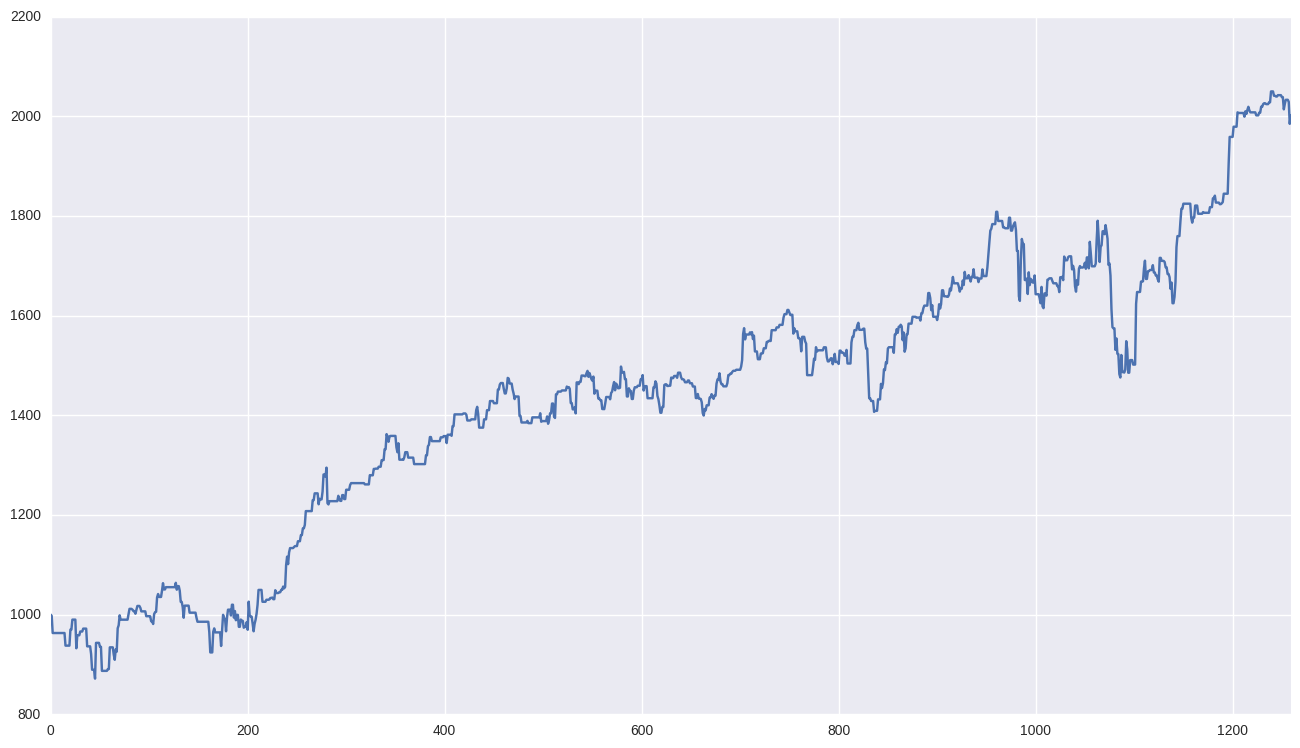

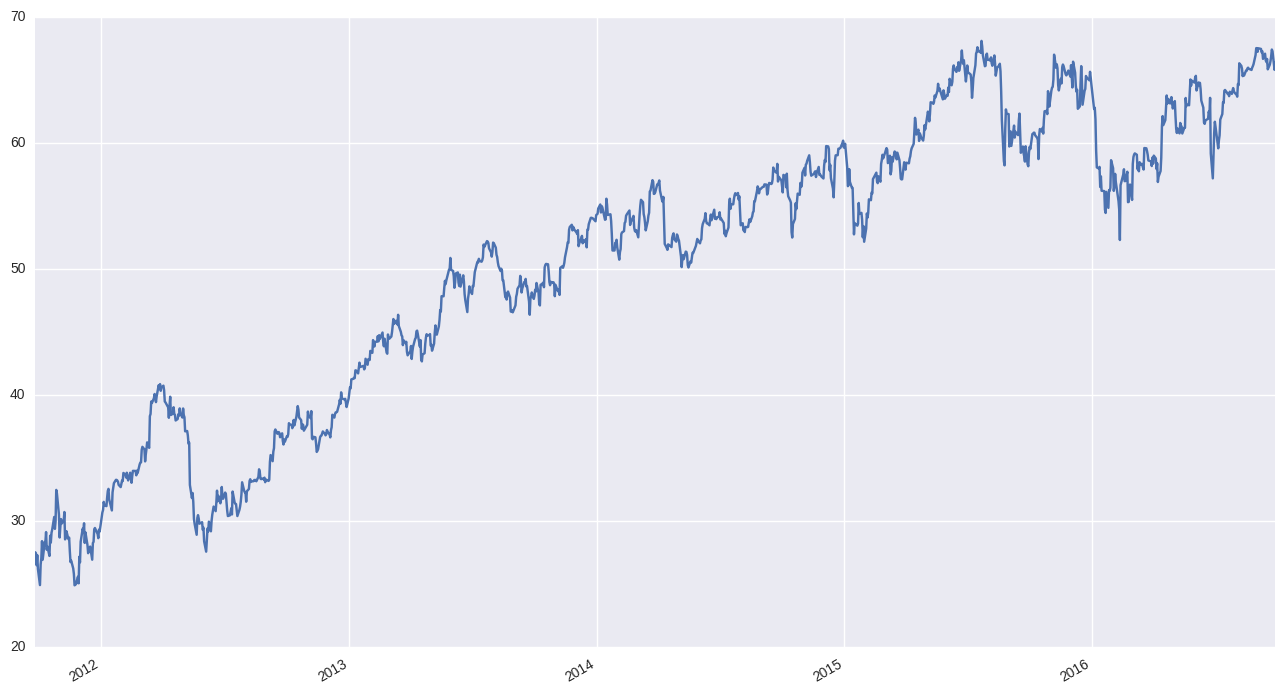

In [52]:
test_pv_history = [1000.0, 997.49836000000005, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 963.10100799999987, 937.77695799999992, 937.77695799999992, 937.77695799999992, 937.77695799999992, 937.77695799999992, 970.02358199999992, 970.02358199999992, 989.97610799999995, 989.97610799999995, 989.97610799999995, 989.97610799999995, 932.49306799999988, 958.57076400000005, 958.57076400000005, 958.57076400000005, 966.14170800000011, 966.14170800000011, 966.14170800000011, 971.92509000000018, 971.92509000000018, 971.92509000000018, 971.92509000000018, 936.35742600000015, 936.35742600000015, 936.35742600000015, 936.35742600000015, 921.02277100000015, 889.43334600000014, 889.43334600000014, 889.43334600000014, 871.55750600000033, 943.35874000000024, 943.35874000000024, 943.35874000000024, 943.35874000000024, 935.50744400000031, 935.50744400000031, 887.15513200000032, 887.15513200000032, 887.15513200000032, 887.15513200000032, 887.15513200000032, 887.15513200000032, 890.68646600000011, 890.68646600000011, 934.3507460000003, 934.3507460000003, 934.3507460000003, 934.3507460000003, 919.68204200000048, 909.35969300000033, 930.27607500000045, 925.65822200000036, 972.65233100000046, 978.67153900000039, 998.64415700000029, 989.88904400000035, 989.88904400000035, 989.88904400000035, 989.88904400000035, 989.88904400000035, 989.88904400000035, 989.88904400000035, 989.88904400000035, 1000.2151340000004, 1011.6003440000003, 1011.6003440000003, 1011.6003440000003, 1010.0116640000003, 1007.0992640000003, 1007.0992640000003, 1001.8037840000003, 1009.4822240000002, 1017.4253540000003, 1017.4253540000003, 1017.4253540000003, 1013.7185540000002, 1006.5697040000003, 1006.5697040000003, 1006.5697040000003, 1006.5697040000003, 1006.5697040000003, 996.84371300000043, 996.84371300000043, 996.84371300000043, 996.84371300000043, 996.58773000000053, 986.6058430000005, 986.6058430000005, 981.23089600000048, 1001.1947860000004, 1005.0339220000004, 1005.8018130000005, 1034.7236870000004, 1041.3783460000004, 1035.4916070000004, 1035.4916070000004, 1035.4916070000004, 1048.0329180000003, 1063.1337400000002, 1050.5924290000003, 1050.5924290000003, 1055.1200860000004, 1055.1200860000004, 1055.1200860000004, 1055.1200860000004, 1055.1200860000004, 1055.1200860000004, 1055.1200860000004, 1055.1200860000004, 1055.1200860000004, 1055.1200860000004, 1063.8399400000005, 1050.0717440000005, 1057.1853180000003, 1057.1853180000003, 1048.0796180000002, 1025.6487930000003, 1025.6487930000003, 1015.2550590000003, 993.77474300000017, 1018.0267110000002, 1018.0267110000002, 1018.0267110000002, 1018.0267110000002, 1018.0267110000002, 1003.9374410000001, 1003.9374410000001, 1003.9374410000001, 1003.9374410000001, 1003.9374410000001, 1003.9374410000001, 1003.9374410000001, 993.72141599999998, 985.72624099999996, 985.72624099999996, 985.72624099999996, 985.72624099999996, 985.72624099999996, 985.72624099999996, 985.72624099999996, 985.72624099999996, 985.72624099999996, 985.72624099999996, 985.72624099999996, 985.72624099999996, 964.93876099999977, 924.16348099999971, 924.16348099999971, 924.16348099999971, 965.47178699999972, 972.35648399999968, 964.3702949999996, 964.3702949999996, 964.3702949999996, 964.3702949999996, 964.3702949999996, 964.3702949999996, 937.10678399999972, 967.00866199999962, 999.62890799999968, 991.77592799999979, 991.77592799999979, 966.56448899999964, 994.41431099999977, 1009.9515359999998, 1009.9515359999998, 1009.9515359999998, 998.2963679999998, 1019.9011359999997, 1019.9011359999997, 994.01452399999971, 1007.2332649999998, 988.78215799999987, 999.5223249999998, 999.5223249999998, 975.53690499999982, 975.53690499999982, 990.19466499999987, 987.50750499999981, 987.50750499999981, 973.74868899999979, 975.46846499999981, 975.46846499999981, 984.90976299999988, 969.63711699999988, 1026.007145, 998.79401199999984, 996.01721799999984, 996.01721799999984, 982.132969, 966.58268699999985, 981.5775729999998, 989.63047399999982, 1001.8485659999999, 1019.620494, 1049.6104209999999, 1049.6104209999999, 1049.6104209999999, 1049.6104209999999, 1025.8190289999998, 1025.8190289999998, 1025.8190289999998, 1025.8190289999998, 1029.8499789999998, 1029.8499789999998, 1029.8499789999998, 1030.4053749999998, 1033.459805, 1033.459805, 1034.2928370000002, 1030.9606469999999, 1030.9606469999999, 1048.9654469999996, 1043.3221769999998, 1043.3221769999998, 1043.3221769999998, 1044.9883029999996, 1044.9883029999996, 1049.7088899999994, 1049.7088899999994, 1056.3732699999996, 1052.7633509999994, 1055.5402689999994, 1099.4144139999994, 1116.3532169999994, 1101.3582069999993, 1124.6837539999995, 1133.5696559999997, 1133.5696559999997, 1133.5696559999997, 1133.5696559999997, 1135.4507459999995, 1137.6006059999997, 1137.6006059999997, 1137.6006059999997, 1147.3195399999997, 1147.3195399999997, 1147.3195399999997, 1159.537632, 1159.537632, 1173.1442139999999, 1173.1442139999999, 1180.074486, 1207.795382, 1207.795382, 1207.795382, 1207.795382, 1207.795382, 1207.795382, 1207.795382, 1229.741174, 1229.741174, 1243.448165, 1243.448165, 1243.448165, 1243.448165, 1221.5025009999999, 1232.4753009999999, 1231.3202290000002, 1231.3202290000002, 1246.8049510000003, 1281.347833, 1281.347833, 1276.881151, 1295.0459349999999, 1223.5779339999997, 1221.1956969999999, 1227.7468569999999, 1227.7468569999999, 1227.7468569999999, 1227.7468569999999, 1227.7468569999999, 1227.7468569999999, 1227.7468569999999, 1227.7468569999999, 1227.7468569999999, 1238.4670719999999, 1232.2136379999999, 1228.342441, 1228.342441, 1239.9559660000002, 1239.9559660000002, 1231.9157800000003, 1231.9157800000003, 1250.6761810000005, 1250.6761810000005, 1250.6761810000005, 1250.6761810000005, 1260.2051730000005, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1263.9590930000006, 1261.4241920000009, 1261.4241920000009, 1261.4241920000009, 1261.4241920000009, 1261.4241920000009, 1279.9590920000007, 1279.6864520000008, 1279.6864520000008, 1279.6864520000008, 1292.4973520000008, 1292.4973520000008, 1293.0425120000009, 1293.0425120000009, 1293.0425120000009, 1296.8585120000007, 1296.8585120000007, 1296.8585120000007, 1309.9419320000006, 1310.2145720000005, 1310.2145720000005, 1332.0202820000006, 1332.0202820000006, 1362.2757620000007, 1357.3694720000005, 1347.0117020000005, 1357.9146020000005, 1358.7322820000006, 1358.7322820000006, 1358.7322820000006, 1358.7322820000006, 1358.7322820000006, 1358.7322820000006, 1335.8362520000005, 1326.0236420000006, 1344.0133820000005, 1311.0322220000005, 1311.0322220000005, 1311.0322220000005, 1311.0322220000005, 1310.7687860000003, 1315.7749690000003, 1326.0510030000003, 1326.0510030000003, 1326.0510030000003, 1315.1117950000003, 1315.1117950000003, 1315.1117950000003, 1315.1117950000003, 1315.1117950000003, 1315.1117950000003, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1302.1373230000002, 1319.691073, 1319.691073, 1338.0676029999997, 1340.8103229999999, 1356.4440730000001, 1356.4440730000001, 1348.2157030000003, 1348.2157030000003, 1348.2157030000003, 1348.2157030000003, 1348.2157030000003, 1348.2157030000003, 1348.2157030000003, 1348.2157030000003, 1348.2157030000003, 1355.8954030000004, 1355.8954030000004, 1355.8954030000004, 1358.3638930000004, 1358.3638930000004, 1358.3638930000004, 1344.3757330000003, 1361.1066130000004, 1361.1066130000004, 1361.1066130000004, 1361.1066130000004, 1358.9123530000004, 1378.3859230000003, 1378.3859230000003, 1401.9736630000002, 1401.9736630000002, 1401.9736630000002, 1401.9736630000002, 1401.9736630000002, 1401.9736630000002, 1401.9736630000002, 1401.9736630000002, 1401.9736630000002, 1403.765607, 1403.765607, 1403.765607, 1401.205735, 1389.6861430000004, 1389.6861430000004, 1389.6861430000004, 1389.6861430000004, 1391.9900670000004, 1391.9900670000004, 1391.9900670000004, 1391.9900670000004, 1391.9900670000004, 1410.4213470000004, 1417.0771710000004, 1402.7416470000003, 1375.3506190000003, 1375.3506190000003, 1375.3506190000003, 1375.3506190000003, 1375.3506190000003, 1391.9900670000002, 1391.9900670000002, 1391.9900670000002, 1410.4175950000001, 1410.4175950000001, 1410.4175950000001, 1428.725451, 1428.725451, 1428.725451, 1428.725451, 1424.341911, 1424.341911, 1424.341911, 1424.341911, 1451.6932079999999, 1451.6932079999999, 1462.0075679999998, 1464.843912, 1464.843912, 1464.843912, 1453.2402920000002, 1443.9574240000002, 1443.9574240000002, 1454.2716720000001, 1475.1581879999999, 1473.8689280000001, 1463.812392, 1463.812392, 1463.812392, 1451.6931520000001, 1443.6995160000001, 1432.6116279999999, 1437.768808, 1437.768808, 1437.768808, 1437.768808, 1398.777061, 1398.777061, 1385.6908400000002, 1385.6908400000002, 1385.6908400000002, 1385.6908400000002, 1385.6908400000002, 1385.6908400000002, 1388.8956300000002, 1384.3554190000004, 1384.3554190000004, 1384.3554190000004, 1384.3554190000004, 1395.9590390000005, 1395.9590390000005, 1395.9590390000005, 1395.9590390000005, 1395.9590390000005, 1395.9590390000005, 1395.9590390000005, 1395.9590390000005, 1404.2104710000006, 1387.1918750000004, 1388.4811350000004, 1388.4811350000004, 1388.4811350000004, 1388.4811350000004, 1388.4811350000004, 1397.8285310000003, 1383.1397700000005, 1390.3505910000003, 1404.0713900000005, 1404.0713900000005, 1423.7108860000005, 1423.7108860000005, 1397.8835150000004, 1394.6551190000005, 1442.2742500000004, 1442.2742500000004, 1447.6549390000002, 1447.6549390000002, 1447.6549390000002, 1447.6549390000002, 1449.992743, 1449.992743, 1449.992743, 1449.992743, 1449.992743, 1457.794758, 1455.3734320000001, 1456.718597, 1453.2211100000002, 1424.7035249999999, 1424.7035249999999, 1412.0589739999998, 1412.0589739999998, 1416.0944399999998, 1403.9879549999996, 1466.1348679999999, 1466.1348679999999, 1462.6374969999999, 1467.2110290000001, 1467.2110290000001, 1479.8555799999999, 1479.8555799999999, 1479.8555799999999, 1478.5567159999998, 1478.5567159999998, 1484.5681850000001, 1489.3273939999997, 1477.3042399999999, 1485.06917, 1478.5567159999998, 1472.5451389999996, 1469.5394179999996, 1477.8052249999998, 1443.4894400000001, 1449.5009899999998, 1449.5009899999998, 1449.5009899999998, 1433.7207049999995, 1433.7207049999995, 1430.2138909999994, 1430.2138909999994, 1412.6803339999994, 1412.6803339999994, 1412.4390799999994, 1423.7756519999994, 1436.8006639999994, 1436.8006639999994, 1436.8006639999994, 1436.8006639999994, 1432.2178259999994, 1445.0015839999996, 1447.6721219999997, 1458.5972699999998, 1466.8518279999996, 1450.3427119999994, 1463.6956359999997, 1461.0250459999995, 1454.4700299999995, 1454.4700299999995, 1455.4411819999991, 1497.9278339999992, 1485.7887979999994, 1485.7887979999994, 1487.3014459999993, 1472.6786239999992, 1472.6786239999992, 1437.8862349999993, 1437.8862349999993, 1454.2739929999991, 1448.9794279999992, 1448.9794279999992, 1432.8438499999995, 1432.8438499999995, 1449.5770419999994, 1456.3748819999994, 1456.3748819999994, 1456.3748819999994, 1459.4003669999991, 1459.4003669999991, 1459.4003669999991, 1472.2583609999992, 1472.2583609999992, 1480.8304019999991, 1449.8197409999987, 1457.887610999999, 1458.6439349999991, 1458.6439349999991, 1434.3658629999993, 1434.3658629999993, 1434.3658629999993, 1434.3658629999993, 1434.3658629999993, 1434.3658629999993, 1456.2161849999995, 1456.2161849999995, 1468.3552209999996, 1463.4995909999998, 1438.9786789999998, 1432.4235849999995, 1420.2845229999996, 1405.2321349999995, 1405.2321349999995, 1416.8856209999994, 1416.8856209999994, 1460.8290009999994, 1462.2856249999993, 1462.2856249999993, 1459.0174249999993, 1459.0174249999993, 1459.5028969999996, 1459.5028969999996, 1475.7691729999997, 1474.7980209999994, 1474.7980209999994, 1479.0264959999995, 1479.0264959999995, 1479.0264959999995, 1475.3617959999995, 1485.6229039999994, 1485.6229039999994, 1485.6229039999994, 1476.6773519999995, 1472.4676639999993, 1472.4676639999993, 1471.4153399999991, 1466.4162759999992, 1466.4162759999992, 1466.4162759999992, 1469.9681799999992, 1469.9681799999992, 1464.443023999999, 1464.443023999999, 1464.443023999999, 1457.8466809999991, 1457.8466809999991, 1457.8466809999991, 1434.6934529999992, 1434.6934529999992, 1442.8497129999994, 1433.6410169999992, 1433.6410169999992, 1432.8798329999993, 1426.2834629999993, 1404.7182659999992, 1399.6441829999992, 1412.8370039999993, 1410.0462029999992, 1420.1944499999993, 1420.1944499999993, 1420.1944499999993, 1435.6706339999994, 1435.6706339999994, 1442.5207499999995, 1438.7150999999997, 1433.1334979999995, 1439.4761759999997, 1439.4761759999997, 1463.5784279999996, 1472.2044689999996, 1472.2044689999996, 1484.3825219999994, 1468.3988999999995, 1462.5636329999993, 1462.5636329999993, 1458.2505449999994, 1458.2505449999994, 1458.2505449999994, 1458.2505449999994, 1464.5932229999996, 1480.8305099999995, 1480.8305099999995, 1483.6213109999994, 1483.6213109999994, 1487.1732149999993, 1489.4565779999994, 1489.4565779999994, 1489.4565779999994, 1491.5003699999995, 1491.5003699999995, 1491.5003699999995, 1491.5003699999995, 1491.5003699999995, 1497.8589739999993, 1510.8412299999995, 1563.3000419999994, 1574.9575339999994, 1552.4373579999992, 1562.2402419999994, 1562.2402419999994, 1562.2402419999994, 1562.2402419999994, 1566.5833809999997, 1562.4956889999994, 1567.0943559999996, 1553.0429079999997, 1559.9409219999993, 1528.2612009999996, 1528.2612009999996, 1528.2612009999996, 1512.6295289999996, 1512.6295289999996, 1512.6295289999996, 1524.0221129999993, 1524.0221129999993, 1524.8169209999994, 1534.6198889999994, 1534.6198889999994, 1534.6198889999994, 1547.3371529999995, 1547.3371529999995, 1549.4566409999993, 1549.4566409999993, 1549.2011939999995, 1570.9170779999995, 1570.9170779999995, 1570.9170779999995, 1570.9170779999995, 1570.9170779999995, 1576.5376139999996, 1576.5376139999996, 1576.5376139999996, 1581.6472829999996, 1581.6472829999996, 1581.6472829999996, 1581.6472829999996, 1595.9541629999994, 1603.1076589999993, 1603.1076589999993, 1603.1076589999993, 1611.5858629999996, 1611.5858629999996, 1606.2207739999994, 1601.1111319999995, 1601.8775539999995, 1601.8775539999995, 1564.0663489999995, 1574.5410529999995, 1568.6650159999997, 1568.6650159999997, 1568.6650159999997, 1555.0333099999996, 1555.0333099999996, 1551.9469129999998, 1528.5414769999995, 1557.6053839999997, 1557.6053839999997, 1557.6053839999997, 1548.3460579999996, 1543.9736779999996, 1480.7017699999994, 1480.7017699999994, 1480.7017699999994, 1480.7017699999994, 1480.7017699999994, 1480.7017699999994, 1496.3911459999995, 1513.8809089999997, 1511.3088349999996, 1536.7719139999997, 1528.0270459999995, 1530.5990119999997, 1530.5990119999997, 1530.5990119999997, 1530.5990119999997, 1530.5990119999997, 1530.5990119999997, 1536.5432879999994, 1536.5432879999994, 1536.5432879999994, 1516.4815579999997, 1508.3081719999998, 1508.3081719999998, 1510.7849840000001, 1514.500072, 1514.500072, 1502.6115980000002, 1510.7849840000001, 1523.416434, 1507.0697919999998, 1507.0697919999998, 1507.0697919999998, 1503.1069760000003, 1529.856088, 1529.856088, 1525.893272, 1525.893272, 1525.1787720000002, 1519.9395220000001, 1519.9395220000001, 1531.3326179999999, 1504.0882320000001, 1504.0882320000001, 1504.0882320000001, 1504.0882320000001, 1546.440906, 1557.5863520000003, 1557.5863520000003, 1570.960908, 1570.960908, 1570.960908, 1581.1156499999997, 1585.8215720000001, 1571.7040139999997, 1571.7040139999997, 1571.7040139999997, 1571.7040139999997, 1574.0337359999999, 1574.0337359999999, 1546.8537539999998, 1533.652104, 1533.9108989999997, 1481.3629589999998, 1434.2509559999999, 1434.2509559999999, 1428.7669839999999, 1428.7669839999999, 1428.7669839999999, 1406.955884, 1409.113034, 1409.113034, 1409.113034, 1432.0457879999999, 1432.0457879999999, 1432.0457879999999, 1463.204526, 1454.7293319999999, 1464.4508620000001, 1492.369038, 1490.6241520000001, 1506.5774140000001, 1504.3339780000001, 1534.2463799999998, 1536.739026, 1536.739026, 1536.739026, 1536.739026, 1536.739026, 1525.5218719999998, 1562.1645559999997, 1562.1645559999997, 1573.1324739999995, 1565.6543019999995, 1577.8685559999997, 1577.8685559999997, 1581.8568779999996, 1578.6163419999996, 1550.9473759999998, 1566.1528519999995, 1527.7652819999996, 1534.7449039999995, 1562.9123159999997, 1562.9123159999997, 1584.1002099999994, 1584.1002099999994, 1584.1002099999994, 1584.1002099999994, 1597.8100099999995, 1597.8100099999995, 1597.8100099999995, 1597.8100099999995, 1595.9980129999997, 1596.2568349999997, 1596.2568349999997, 1596.2568349999997, 1590.2634829999997, 1605.1163989999995, 1605.1163989999995, 1615.0182709999995, 1620.2298379999995, 1620.2298379999995, 1620.2298379999995, 1620.2298379999995, 1645.5059149999995, 1645.5059149999995, 1635.4689009999993, 1611.1289749999992, 1621.1660929999994, 1597.8298969999994, 1597.8298969999994, 1597.8298969999994, 1597.8298969999994, 1591.3058469999994, 1601.8447129999995, 1622.9225749999996, 1614.3910649999996, 1623.1735529999996, 1651.0264169999996, 1651.0264169999996, 1638.9818649999997, 1638.9818649999997, 1638.9818649999997, 1638.0167399999996, 1638.0167399999996, 1641.8770399999996, 1654.6648149999996, 1650.5629899999997, 1663.5918899999995, 1677.8272399999994, 1665.0396649999996, 1665.0396649999996, 1665.0396649999996, 1665.0396649999996, 1665.0396649999996, 1658.5251149999995, 1648.3915899999995, 1655.6299399999996, 1654.1821649999997, 1670.5888899999995, 1661.6618149999995, 1687.9607649999996, 1675.1731899999993, 1675.1731899999993, 1675.1731899999993, 1681.446214999999, 1674.9318649999989, 1668.658639999999, 1677.8272399999992, 1677.8272399999992, 1693.2688649999993, 1676.3796399999994, 1676.3796399999994, 1676.3796399999994, 1676.3796399999994, 1667.4525399999993, 1674.6907149999995, 1674.6907149999995, 1674.6907149999995, 1692.9046649999993, 1679.5476899999994, 1679.5476899999994, 1679.5476899999994, 1679.5476899999994, 1696.7222239999992, 1720.4635519999993, 1746.7303119999992, 1770.7242559999997, 1774.5127939999995, 1783.857635999999, 1783.857635999999, 1783.857635999999, 1783.857635999999, 1808.6092719999988, 1808.6092719999988, 1790.1720219999988, 1790.1720219999988, 1790.1720219999988, 1790.1720219999988, 1790.1720219999988, 1777.2910759999986, 1777.2910759999986, 1775.5231279999985, 1775.5231279999985, 1775.5231279999985, 1775.5231279999985, 1796.7386339999985, 1796.7386339999985, 1770.7727069999987, 1770.7727069999987, 1779.3598829999987, 1783.9060869999985, 1787.4420089999983, 1772.0354229999987, 1730.1094609999984, 1730.1094609999984, 1638.9912169999982, 1629.7433769999984, 1711.3418449999981, 1754.0451489999984, 1744.5251489999982, 1743.7092009999981, 1671.6306209999982, 1671.6306209999982, 1674.5157059999981, 1643.5665779999979, 1687.1051849999981, 1661.4016709999983, 1673.9911499999982, 1671.3683699999981, 1666.647311999998, 1666.647311999998, 1680.790973999998, 1643.1585999999979, 1643.1585999999979, 1643.1585999999979, 1643.1585999999979, 1636.0769859999982, 1625.0612559999981, 1657.8463569999981, 1618.7664759999982, 1615.0945569999983, 1644.732321999998, 1644.732321999998, 1640.241384999998, 1672.2063339999982, 1672.9988109999981, 1675.1122629999982, 1675.1122629999982, 1675.1122629999982, 1669.5646539999982, 1665.0736629999983, 1665.0736629999983, 1665.0736629999983, 1665.0736629999983, 1659.5260539999981, 1659.5260539999981, 1647.3741099999984, 1677.2256069999983, 1677.2256069999983, 1677.9888369999985, 1671.3746449999983, 1718.6910309999985, 1711.3137389999986, 1711.3137389999986, 1711.3137389999986, 1717.4190069999986, 1719.199746999999, 1719.199746999999, 1719.199746999999, 1693.0270219999986, 1700.1205969999987, 1692.0485969999988, 1659.0269719999988, 1648.2642969999988, 1671.5018719999989, 1662.2067719999986, 1694.494596999999, 1699.6314719999987, 1696.6961469999987, 1696.6961469999987, 1696.6961469999987, 1698.6530219999988, 1706.235721999999, 1694.2501219999988, 1716.9983969999987, 1716.9983969999987, 1695.1209309999988, 1748.2881489999984, 1725.6475309999985, 1699.1910489999984, 1699.1910489999984, 1699.1910489999984, 1699.1910489999984, 1704.4744359999986, 1752.8181789999983, 1790.5949589999984, 1757.5733109999985, 1707.9088089999987, 1738.0245549999984, 1741.7229609999983, 1769.4612219999988, 1769.4612219999988, 1763.649390999999, 1781.8773879999992, 1769.196999999999, 1754.4033489999988, 1702.0121709999989, 1704.9375939999993, 1680.4706529999992, 1612.9204869999992, 1577.0178039999992, 1574.6243889999992, 1574.6243889999992, 1531.5412719999993, 1554.4125939999994, 1523.5629339999991, 1522.7650299999996, 1482.8732049999996, 1475.9586669999994, 1521.1694109999994, 1486.8624279999995, 1486.8624279999995, 1485.8380279999994, 1491.9842719999997, 1548.8375099999996, 1532.4474219999997, 1485.5818759999997, 1485.5818759999997, 1510.9353859999999, 1510.9353859999999, 1510.9353859999999, 1501.8932479999999, 1501.8932479999999, 1501.8932479999999, 1623.7948040000001, 1647.5130999999999, 1647.5130999999999, 1647.5130999999999, 1647.7888440000002, 1668.4735080000003, 1668.4735080000003, 1669.0645380000001, 1694.7725580000006, 1710.4338480000004, 1673.7924480000001, 1673.7924480000001, 1689.2369120000003, 1689.2369120000003, 1691.7190840000001, 1691.7190840000001, 1691.7190840000001, 1701.4310389999998, 1686.8631790000002, 1686.8631790000002, 1680.7956629999999, 1680.7956629999999, 1673.0733190000001, 1668.384859, 1716.0974189999999, 1716.0974189999999, 1710.0299870000001, 1710.0299870000001, 1710.0299870000001, 1707.7448740000002, 1697.1759400000001, 1697.1759400000001, 1683.66202, 1683.66202, 1677.2718320000001, 1653.9335240000003, 1666.4362240000003, 1625.0384200000001, 1625.0384200000001, 1637.818908, 1667.825276, 1737.5624400000002, 1759.7893999999999, 1759.7893999999999, 1759.7893999999999, 1788.9622919999997, 1814.52324, 1814.52324, 1824.8032720000001, 1824.8032720000001, 1824.8032720000001, 1824.8032720000001, 1824.8032720000001, 1824.8032720000001, 1824.8032720000001, 1824.8032720000001, 1796.3149770000002, 1786.8189560000003, 1797.1782490000001, 1797.1782490000001, 1821.0623590000002, 1821.0623590000002, 1821.0623590000002, 1804.6600750000002, 1804.6600750000002, 1804.6600750000002, 1804.6600750000002, 1804.6600750000002, 1807.9940910000005, 1806.6049270000005, 1806.6049270000005, 1806.6049270000005, 1806.6049270000005, 1806.6049270000005, 1806.6049270000005, 1817.8574740000004, 1817.8574740000004, 1817.8574740000004, 1835.639042, 1835.639042, 1840.9180220000003, 1827.0261580000004, 1827.0261580000004, 1827.0261580000004, 1827.0261580000004, 1823.8607790000003, 1823.8607790000003, 1825.5872650000003, 1828.1771100000003, 1844.8672480000002, 1844.8672480000002, 1844.8672480000002, 1844.8672480000002, 1844.8672480000002, 1905.5151200000005, 1958.8598880000004, 1958.8598880000004, 1958.8598880000004, 1958.8598880000004, 1979.3398880000004, 1979.3398880000004, 1979.3398880000004, 1979.3398880000004, 2008.1699190000004, 2006.9298880000001, 2006.9298880000001, 2006.9298880000001, 2006.9298880000001, 2006.9298880000001, 2006.9298880000001, 1999.4898570000003, 2010.3399190000002, 2005.0698570000002, 2013.1297950000003, 2019.3299500000005, 2012.1998260000003, 2008.1699190000004, 2008.1699190000004, 2008.1699190000004, 2008.1699190000004, 2008.1699190000004, 2008.1699190000004, 2002.1697690000003, 2002.1697690000003, 2002.1697690000003, 2007.569769, 2007.569769, 2019.5697989999999, 2019.2697389999998, 2024.6697390000002, 2026.469679, 2026.469679, 2024.6697390000002, 2024.6697390000002, 2024.6697390000002, 2028.2698290000001, 2028.2698290000001, 2050.1697090000002, 2050.1697090000002, 2050.1697090000002, 2041.469679, 2041.469679, 2039.9697990000002, 2039.9697990000002, 2042.6696790000001, 2042.6696790000001, 2042.6696790000001, 2042.6696790000001, 2038.769769, 2038.769769, 2014.1697989999998, 2025.269859, 2033.3697689999997, 2033.3697689999997, 2033.3697689999997, 2029.1697989999996, 1985.0697689999997, 2002.4698289999994]
pd.Series(test_pv_history).plot(figsize=(16, 9))
plt.figure()
test_set.iloc[:len(test_pv_history) + 1]['Adj Close'].plot(figsize=(16, 9))

In [53]:
display(adj_jpm.head())

,Open,High,Low,Volume,Adj Close
1983-12-30,2.602623,2.632198,2.573048,3.575624e+06,2.602623
1984-01-03,2.598926,2.617409,2.580440,6.517272e+06,2.602623
1984-01-04,2.652532,2.713529,2.617410,4.945011e+06,2.713529
1984-01-05,2.768984,2.802256,2.735712,5.817363e+06,2.802256
1984-01-06,2.772681,2.802256,2.743106,3.286531e+06,2.772681


In [59]:
diff1_temp = adj_jpm - adj_jpm.shift()
diff1 = diff1_temp.add_suffix('_diff1')
diff2 = diff1_temp - diff1_temp.shift()
diff2 = diff2.add_suffix('_diff2')

test = pd.concat([adj_jpm, diff1, diff2], axis=1)
display(test)

# diff2 = diff1 - diff1.shift()


,Open,High,Low,Volume,Adj Close,Open_diff1,High_diff1,Low_diff1,Volume_diff1,Adj Close_diff1,Open_diff2,High_diff2,Low_diff2,Volume_diff2,Adj Close_diff2
1983-12-30,2.602623,2.632198,2.573048,3.575624e+06,2.602623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-03,2.598926,2.617409,2.580440,6.517272e+06,2.602623,-3.697025e-03,-1.478881e-02,7.391744e-03,2.941648e+06,0.000000,NaN,NaN,NaN,NaN,NaN
1984-01-04,2.652532,2.713529,2.617410,4.945011e+06,2.713529,5.360576e-02,9.611967e-02,3.696997e-02,-1.572261e+06,0.110906,5.730279e-02,1.109085e-01,2.957823e-02,-4.513909e+06,0.110906
1984-01-05,2.768984,2.802256,2.735712,5.817363e+06,2.802256,1.164521e-01,8.872700e-02,1.183019e-01,8.723517e+05,0.088727,6.284633e-02,-7.392673e-03,8.133189e-02,2.444613e+06,-0.022179
1984-01-06,2.772681,2.802256,2.743106,3.286531e+06,2.772681,3.697163e-03,-9.974000e-08,7.394485e-03,-2.530832e+06,-0.029575,-1.127549e-01,-8.872710e-02,-1.109074e-01,-3.403183e+06,-0.118302
1984-01-09,2.780073,2.802256,2.757892,3.656773e+06,2.780073,7.392000e-03,2.585300e-07,1.478628e-02,3.702416e+05,0.007392,3.694837e-03,3.582700e-07,7.391800e-03,2.901073e+06,0.036967
1984-01-10,2.820739,2.854012,2.787467,2.419252e+06,2.831831,4.066645e-02,5.175545e-02,2.957485e-02,-1.237521e+06,0.051758,3.327445e-02,5.175520e-02,1.478856e-02,-1.607762e+06,0.044366
1984-01-11,2.831831,2.898376,2.802256,6.725216e+06,2.890981,1.109174e-02,4.436391e-02,1.478877e-02,4.305964e+06,0.059150,-2.957471e-02,-7.391543e-03,-1.478608e-02,5.543485e+06,0.007392
1984-01-12,2.890981,2.935345,2.876195,5.036305e+06,2.920556,5.914967e-02,3.696905e-02,7.393877e-02,-1.688912e+06,0.029575,4.805792e-02,-7.394861e-03,5.915001e-02,-5.994876e+06,-0.029575
1984-01-13,2.950131,2.972314,2.927951,9.996531e+06,2.935345,5.915047e-02,3.696986e-02,5.175588e-02,4.960226e+06,0.014789,7.989400e-07,8.053200e-07,-2.218289e-02,6.649138e+06,-0.014786


0